# ECS7024 Statistics for Artificial Intelligence and Data Science

### To do

 1. Everything
 

## Notebook 2: Aims and Outline

The overall aim of this notebook is to ... gain familiarity with histograms, as a . 
  * Summary statistics
  * Describe
  * Boxplot

 1. Section 1: Introducing the Data Set
      1. A
      1. B
 
 2. Section 2: Network as a whole
      1. F
      1. G
      1. H
      
 2. Section 3: Distribution of Morning Entries
      1. F
      1. G
      1. H
 
 3. Section 4: Morning and evening peak
      1. F
      1. G
      1. H
 
 4. Section 5: The commute to work
      1. F
      1. G
      1. H

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exit = pd.read_csv('En17week.csv')
exit

,nlc,Station,Q0200-0215,Q0215-0230,Q0230-0245,Q0245-0300,Q0300-0315,Q0315-0330,Q0330-0345,Q0345-0400,...,Q0115-0130,Q0130-0145,Q0145-0200,Total,Early,AMPeak,Interpeak,PMPeak,Evening,Late
0,500,Acton Town,0,0,0,0,0,0,0,0,...,2,2,0,9531,608,3287,2705,2029,655,247
1,502,Aldgate,0,0,0,0,0,0,0,0,...,0,0,0,15080,252,2774,3078,6931,1596,449
2,503,Aldgate East,0,0,0,0,0,0,0,0,...,0,0,0,22327,290,3225,6301,8096,3104,1311
3,505,Alperton,0,0,0,0,0,0,0,0,...,0,0,0,4495,558,1618,1073,831,313,102
4,506,Amersham,0,0,0,0,0,0,0,0,...,0,0,0,3848,538,1952,701,534,92,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,768,Wimbledon Park,0,0,0,0,0,0,0,0,...,0,0,0,3583,206,1595,879,687,180,36
264,770,Wood Green,0,0,0,0,0,0,0,0,...,4,3,2,20042,2380,6838,5127,3435,1320,942
265,599,Wood Lane,0,0,0,0,0,0,0,0,...,0,0,0,6242,141,1235,1594,2152,915,205
266,769,Woodford,0,0,0,0,0,0,0,0,...,0,0,0,9442,1110,4850,2188,953,280,61


In [3]:
exit.Station

0          Acton Town
1             Aldgate
2        Aldgate East
3            Alperton
4            Amersham
            ...      
263    Wimbledon Park
264        Wood Green
265         Wood Lane
266          Woodford
267     Woodside Park
Name: Station, Length: 268, dtype: object

In [4]:
def nextHr(ss):
    h = int(ss)
    if h < 9: return '0'+str(h+1)
    if h < 24: return str(h+1)
    return '01'

hours = ['05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00','01']
exit_h = pd.DataFrame()
exit_h['Station'] = exit.Station

for h in hours:
    col = 'H' + h
    q1 = 'Q'+h+'00'+'-'+h+'15'
    q2 = 'Q'+h+'15'+'-'+h+'30'
    q3 = 'Q'+h+'30'+'-'+h+'45'
    q4 = 'Q'+h+'45'+'-'+nextHr(h)+'00'
    qs = exit[q1] + exit[q1] + exit[q3] + exit[q4]
    exit_h[col] = qs

exit_h

,Station,H05,H06,H07,H08,H09,H10,H11,H12,H13,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
0,Acton Town,142,447,1079,1444,756,447,412,400,392,...,712,743,594,327,204,143,115,87,38,8
1,Aldgate,39,190,615,1310,817,374,363,468,512,...,1528,3109,2187,862,458,351,248,171,49,0
2,Aldgate East,61,204,597,1354,1185,892,845,946,1071,...,1953,3237,2787,1395,953,829,656,513,181,6
3,Alperton,118,402,711,636,303,195,167,172,181,...,240,328,252,155,94,75,62,32,9,0
4,Amersham,79,400,1108,719,226,132,108,95,84,...,239,208,103,40,25,26,19,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Wimbledon Park,30,167,623,678,297,167,149,144,144,...,217,271,195,108,49,31,21,13,3,0
264,Wood Green,413,1822,2604,2689,1679,990,845,785,788,...,1113,1290,1018,623,407,328,379,472,72,15
265,Wood Lane,36,101,314,530,370,194,191,232,289,...,542,828,748,429,278,234,158,53,13,0
266,Woodford,214,831,1809,2100,986,517,422,347,310,...,333,342,276,155,94,38,37,22,6,0


array([[<AxesSubplot:title={'center':'H08'}>,
        <AxesSubplot:title={'center':'H13'}>],
       [<AxesSubplot:title={'center':'H20'}>,
        <AxesSubplot:title={'center':'H22'}>]], dtype=object)

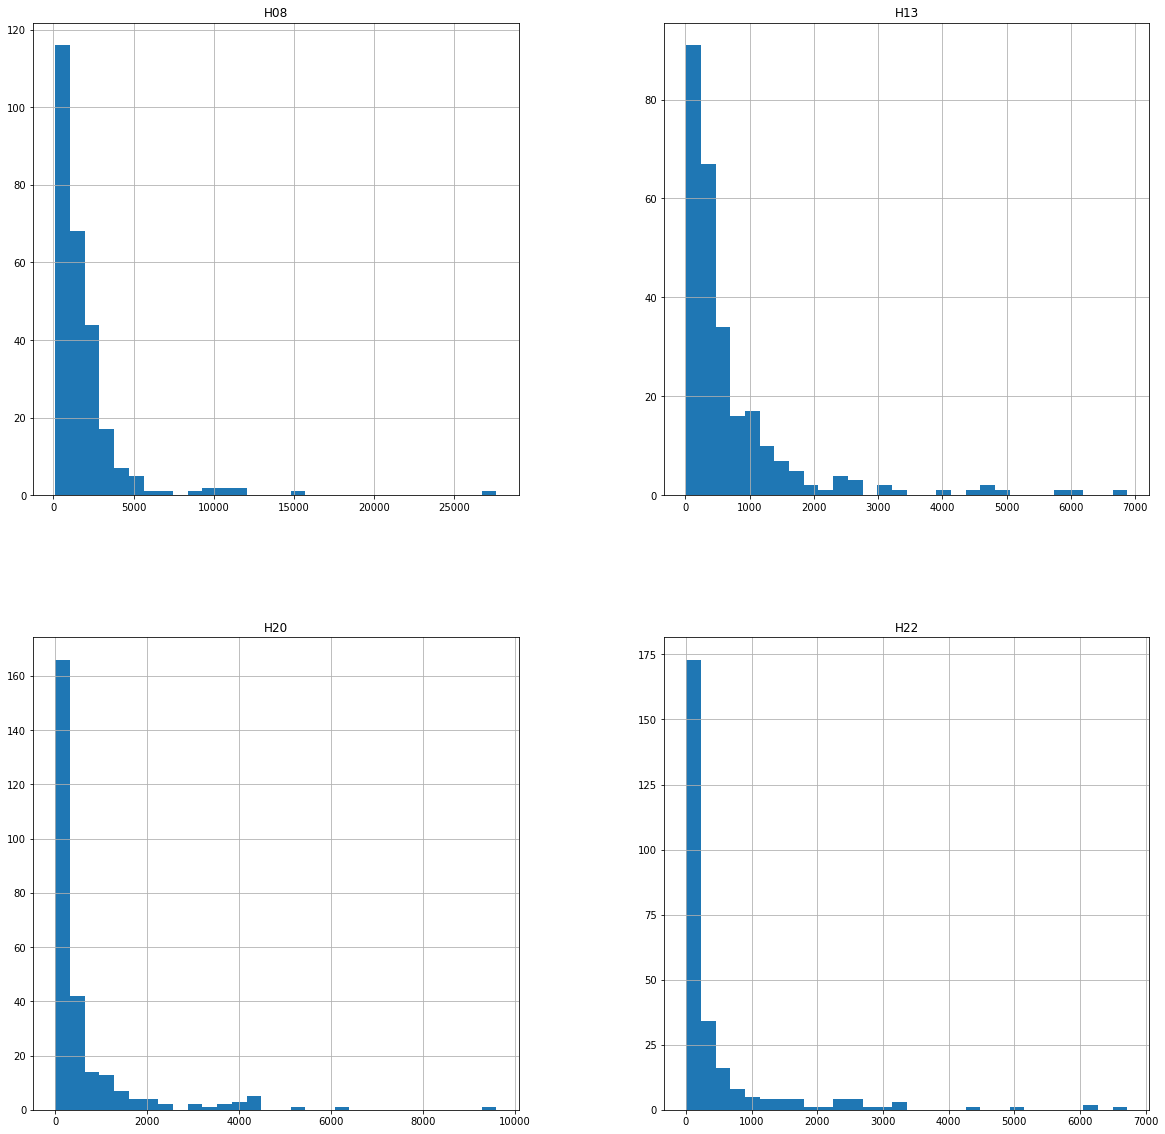

In [5]:
exit_h.hist(figsize=(20,20), column=['H08','H13','H20','H22'], bins=30)

In [6]:
exit_h.to_csv('hourlyEntries.csv', index=False)